In [1]:
#import libraries that we will use in the code 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the file 
heart = pd.read_csv(r"heart.csv")

We will take a look at our data set before starting data preprocessing

Making some data exploration to understand the char. of dataset

In [3]:
#displaying 10 random columns from the dataset
heart.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
662,44,M,ASY,110,197,0,LVH,177,N,0.0,Up,1
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
721,51,M,NAP,100,222,0,Normal,143,Y,1.2,Flat,0
646,66,M,ASY,160,228,0,LVH,138,N,2.3,Up,0
188,50,F,ASY,120,328,0,Normal,110,Y,1.0,Flat,0
790,62,F,ASY,138,294,1,Normal,106,N,1.9,Flat,1
710,47,M,ASY,110,275,0,LVH,118,Y,1.0,Flat,1
442,51,M,ASY,128,0,1,ST,125,Y,1.2,Flat,1
612,55,M,ASY,122,223,1,ST,100,N,0.0,Flat,1


In [4]:
#displaying number of rows and columns of dataset
heart.shape

(918, 12)

In [5]:
#displaying some info about the dataset
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


*We can see from the info() that there is no null values in each column

*There is 12 columns and 918 rows

*Type of Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope is string(object) and we will change them into integers later to easily deal with them

*We know that the heart disease in this dataset is heart failure so we will change the name of this column

In [6]:
#Displaying the number of unique values in each column
for col in heart.columns:
  print(f'The unique values in {col} = {len(heart[col].unique())}')

The unique values in Age = 50
The unique values in Sex = 2
The unique values in ChestPainType = 4
The unique values in RestingBP = 67
The unique values in Cholesterol = 222
The unique values in FastingBS = 2
The unique values in RestingECG = 3
The unique values in MaxHR = 119
The unique values in ExerciseAngina = 2
The unique values in Oldpeak = 53
The unique values in ST_Slope = 3
The unique values in HeartDisease = 2


In [7]:
#using describe function to display summary the statistics of the dataset
print(heart.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


# DATA PREPROCESSING

#### *Note:Heart failure column is the target column we will not use it in data preprocessing

In [8]:
heart.rename(columns={'HeartDisease': 'HeartFailure'}, inplace=True)

## 1)Data cleaning:

In [9]:
#checking if there is any null values
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartFailure      0
dtype: int64

There is no null values in the data set so there is no need to use heart.dropna() method

In [10]:
#checking if there is any duplicated rows
heart.duplicated().sum()

0

#### There is no need to use drop_duplicates() as there is no duplicated rows

In [11]:
#categ encoding(Its part from data transformation but we will use it here for detecting outliers)
ExerciseAngina = {"N":0, "Y":1}
heart['ExerciseAngina'] = heart['ExerciseAngina'].map(ExerciseAngina)

ST_Slope = {"Flat":0, "Up":1, "Down":2}
heart['ST_Slope'] = heart['ST_Slope'].map(ST_Slope)

RestingEGG = {"Normal":0, "LVH":1, "ST":2}
heart['RestingECG'] = heart['RestingECG'].map(RestingEGG)

ChestPain = {"ASY":0, "NAP":1, "ATA":2, "TA":3}
heart['ChestPainType'] = heart['ChestPainType'].map(ChestPain)

S = {"M":0, "F":1}
heart['Sex'] = heart['Sex'].map(S)


In [12]:
#We changed all the columns into numbers 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartFailure    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [13]:
#The range of values of Cholesterol ranges from 126 to 564 so there is some wrong data we will remove(inconsistencies)
for x in heart.index:
    if heart.loc[x,"Cholesterol"]>564 or heart.loc[x,"Cholesterol"]<126:
        heart.drop(x,inplace=True)
heart.describe()        

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,52.814363,0.246612,0.841463,133.101626,245.456640,0.165312,0.574526,140.369919,0.382114,0.895799,0.584011,0.474255
std,9.457006,0.431331,0.956625,17.231104,56.396459,0.371714,0.764193,24.596555,0.486234,1.071068,0.597702,0.499675
min,28.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,238.000000,0.000000,0.000000,140.000000,0.000000,0.500000,1.000000,0.000000
75%,59.000000,0.000000,2.000000,140.000000,275.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [14]:
#Checking if there is any outliers in the values of numerical columns

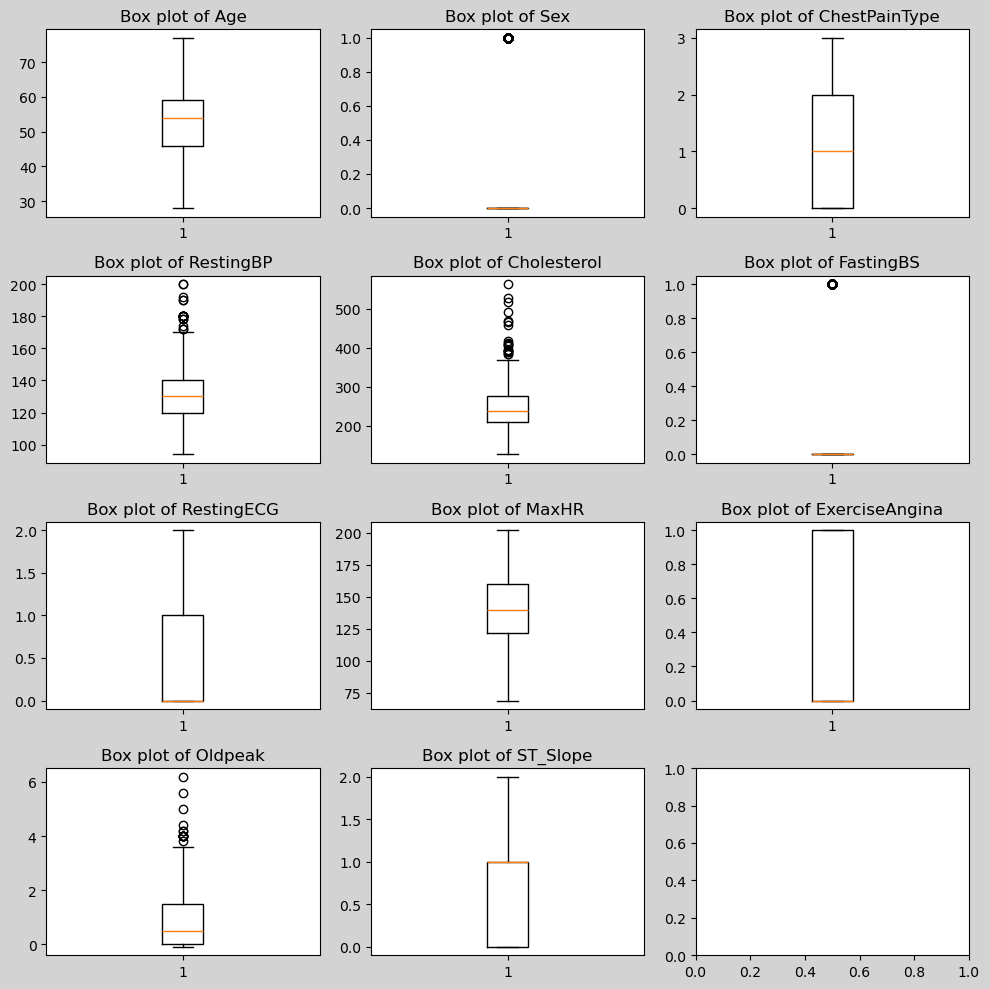

In [15]:
#Displaying box plot of each column 
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
fig.set_facecolor('lightgrey')

axs[0, 0].boxplot(heart['Age'])
axs[0, 0].set_title('Box plot of Age')

axs[0, 1].boxplot(heart['Sex'])
axs[0, 1].set_title('Box plot of Sex')

axs[0, 2].boxplot(heart['ChestPainType'])
axs[0, 2].set_title('Box plot of ChestPainType')

axs[1, 0].boxplot(heart['RestingBP'])
axs[1, 0].set_title('Box plot of RestingBP')

axs[1, 1].boxplot(heart['Cholesterol'])
axs[1, 1].set_title('Box plot of Cholesterol')

axs[1, 2].boxplot(heart['FastingBS'])
axs[1, 2].set_title('Box plot of FastingBS')

axs[2, 0].boxplot(heart['RestingECG'])
axs[2, 0].set_title('Box plot of RestingECG')

axs[2, 1].boxplot(heart['MaxHR'])
axs[2, 1].set_title('Box plot of MaxHR')

axs[2,2].boxplot(heart['ExerciseAngina'])
axs[2,2].set_title('Box plot of ExerciseAngina')

axs[3, 0].boxplot(heart['Oldpeak'])
axs[3, 0].set_title('Box plot of Oldpeak')

axs[3, 1].boxplot(heart['ST_Slope'])
axs[3, 1].set_title('Box plot of ST_Slope')

plt.tight_layout()
plt.show()


#### There 4 col that dont have outliers

In [16]:
num_cols = ['RestingBP','Cholesterol','Oldpeak']

for col in num_cols:
    Q1 = heart[col].quantile(0.25)
    Q3 = heart[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR

    Upper_outliers = heart[heart[col] > Upper].index
    Lower_outliers = heart[heart[col] < Lower].index

    heart.drop(Upper_outliers, inplace=True)
    heart.drop(Lower_outliers, inplace=True)

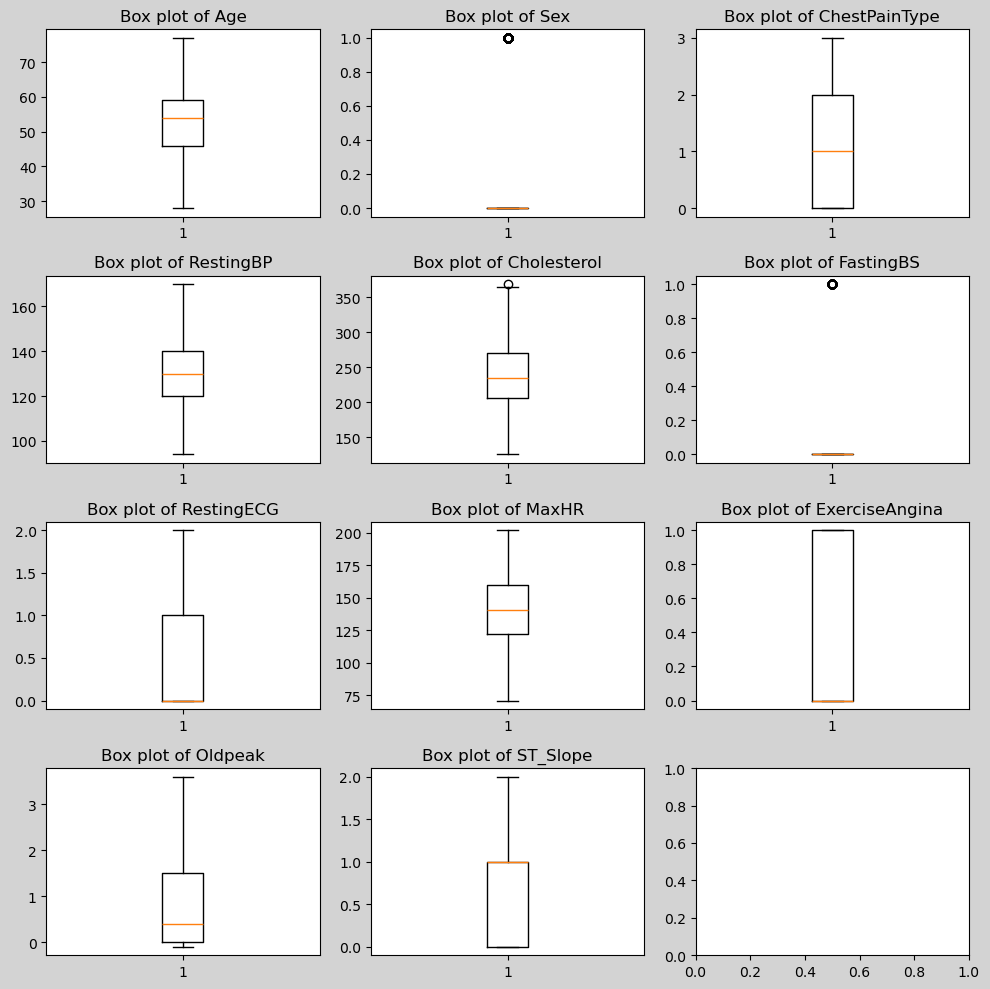

In [17]:
#Displaying box plot of each column after removing outliers
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
fig.set_facecolor('lightgrey')

axs[0, 0].boxplot(heart['Age'])
axs[0, 0].set_title('Box plot of Age')

axs[0, 1].boxplot(heart['Sex'])
axs[0, 1].set_title('Box plot of Sex')

axs[0, 2].boxplot(heart['ChestPainType'])
axs[0, 2].set_title('Box plot of ChestPainType')

axs[1, 0].boxplot(heart['RestingBP'])
axs[1, 0].set_title('Box plot of RestingBP')

axs[1, 1].boxplot(heart['Cholesterol'])
axs[1, 1].set_title('Box plot of Cholesterol')

axs[1, 2].boxplot(heart['FastingBS'])
axs[1, 2].set_title('Box plot of FastingBS')

axs[2, 0].boxplot(heart['RestingECG'])
axs[2, 0].set_title('Box plot of RestingECG')

axs[2, 1].boxplot(heart['MaxHR'])
axs[2, 1].set_title('Box plot of MaxHR')

axs[2,2].boxplot(heart['ExerciseAngina'])
axs[2,2].set_title('Box plot of ExerciseAngina')

axs[3, 0].boxplot(heart['Oldpeak'])
axs[3, 0].set_title('Box plot of Oldpeak')

axs[3, 1].boxplot(heart['ST_Slope'])
axs[3, 1].set_title('Box plot of ST_Slope')

plt.tight_layout()
plt.show()


In [18]:
#We can see after removing outliers number of rows has decreased
heart.shape

(688, 12)

In [19]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,52.619186,0.239826,0.864826,131.463663,239.515988,0.159884,0.561047,140.736919,0.372093,0.821657,0.575581,0.459302
std,9.485776,0.427288,0.957943,15.275114,46.952449,0.366765,0.758682,24.511453,0.483715,0.955401,0.578697,0.498704
min,28.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,207.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,235.000000,0.000000,0.000000,141.000000,0.000000,0.400000,1.000000,0.000000
75%,59.000000,0.000000,2.000000,140.000000,271.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.000000,1.000000,2.000000,202.000000,1.000000,3.600000,2.000000,1.000000


# Exploratory Data Analysis (EDA)

### Mapping HeartFailiure to string to help with visualization

In [20]:
correlation_matrix = heart.corr()
correlation_matrix

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
Age,1.000000,-0.059316,-0.166983,0.270800,0.087818,0.227559,0.195787,-0.403632,0.250771,0.286131,-0.161009,0.307189
Sex,-0.059316,1.000000,0.157552,-0.079284,0.070368,-0.096420,-0.025022,0.149322,-0.207020,-0.151801,0.076698,-0.305923
ChestPainType,-0.166983,0.157552,1.000000,-0.028836,-0.062849,-0.029543,-0.075752,0.344460,-0.453594,-0.295164,0.263963,-0.464000
RestingBP,0.270800,-0.079284,-0.028836,1.000000,0.054040,0.163945,0.075742,-0.128713,0.154509,0.205066,-0.048183,0.172065
Cholesterol,0.087818,0.070368,-0.062849,0.054040,1.000000,0.030197,0.003344,-0.010812,0.128368,0.088436,-0.078661,0.113571
FastingBS,0.227559,-0.096420,-0.029543,0.163945,0.030197,1.000000,0.179349,-0.108655,0.107234,0.074431,-0.070734,0.162957
RestingECG,0.195787,-0.025022,-0.075752,0.075742,0.003344,0.179349,1.000000,-0.107270,0.124434,0.081010,-0.053624,0.129685
MaxHR,-0.403632,0.149322,0.344460,-0.128713,-0.010812,-0.108655,-0.107270,1.000000,-0.418719,-0.276391,0.295250,-0.390917
ExerciseAngina,0.250771,-0.207020,-0.453594,0.154509,0.128368,0.107234,0.124434,-0.418719,1.000000,0.492158,-0.339813,0.551628
Oldpeak,0.286131,-0.151801,-0.295164,0.205066,0.088436,0.074431,0.081010,-0.276391,0.492158,1.000000,-0.284009,0.496309


In [21]:
heart.skew()

Age              -0.083545
Sex               1.221346
ChestPainType     0.661541
RestingBP         0.214501
Cholesterol       0.245150
FastingBS         1.860090
RestingECG        0.925738
MaxHR            -0.161492
ExerciseAngina    0.530395
Oldpeak           0.896801
ST_Slope          0.403273
HeartFailure      0.163690
dtype: float64

In [22]:
HeartFailure = {0:"No Heart Failure", 1:"Heart Failure"}
heart['HeartFailure'] = heart['HeartFailure'].map(HeartFailure)

## Features Distribution

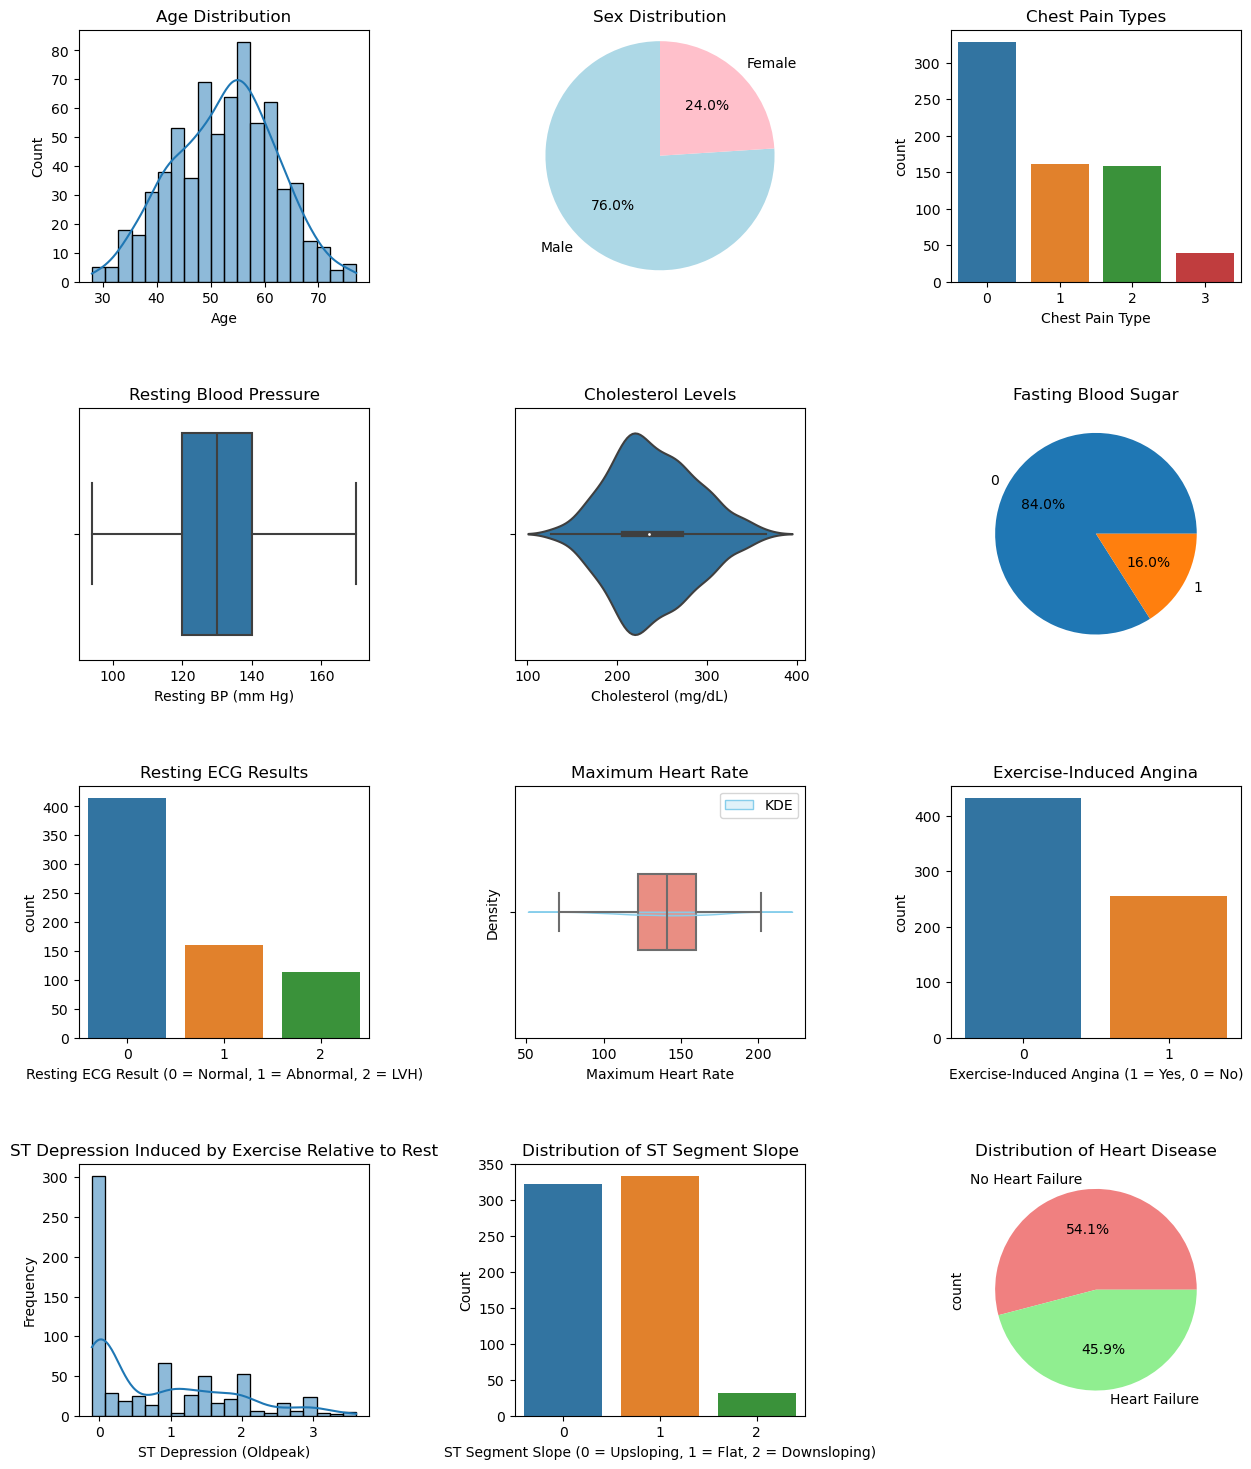

<Figure size 800x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [23]:
with pd.option_context('mode.use_inf_as_na', True):
    
    # Create a 3x4 grid of subplots (3 rows, 4 columns)
    fig, axs = plt.subplots(4, 3, figsize=(15, 18), sharex=False, sharey=False, gridspec_kw={"hspace": 0.5, "wspace": 0.5})
    
    # Age distribution (Histogram and KDE)
    sns.histplot(heart["Age"], bins=20, kde=True, ax=axs[0, 0])
    axs[0, 0].set_title("Age Distribution")
    axs[0, 0].set_xlabel("Age")
    # Age distribution is slightly right-skewed, with most patients in the 40-70 age range.
    

    # Plot Sex distribution using pie chart
    sex_counts = heart["Sex"].value_counts()
    labels = ['Male', 'Female']
    colors = ['lightblue', 'pink']
    axs[0, 1].pie(sex_counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
    axs[0, 1].set_title("Sex Distribution")
    # Equal aspect ratio ensures that pie is drawn as a circle
    axs[0, 1].axis('equal')
    
    # Chest Pain Types (Countplot)
    sns.countplot(x="ChestPainType", data=heart, ax=axs[0, 2])
    axs[0, 2].set_title("Chest Pain Types")
    axs[0, 2].set_xlabel("Chest Pain Type")
    # Most patients have chest pain type 0 (typical angina).
    
    # Resting Blood Pressure (Boxplot)
    sns.boxplot(x="RestingBP", data=heart, ax=axs[1, 0])
    axs[1, 0].set_title("Resting Blood Pressure")
    axs[1, 0].set_xlabel("Resting BP (mm Hg)")
    # Resting blood pressure distribution with outliers.
    
    # Cholesterol Levels (Violinplot)
    sns.violinplot(x="Cholesterol", data=heart, ax=axs[1, 1])
    axs[1, 1].set_title("Cholesterol Levels")
    axs[1, 1].set_xlabel("Cholesterol (mg/dL)")
    # Cholesterol levels distribution with density estimation.
    
    # Fasting Blood Sugar (Pie Chart)
    heart["FastingBS"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=axs[1, 2])
    axs[1, 2].set_title("Fasting Blood Sugar")
    axs[1, 2].set_ylabel("")
    # Most patients have fasting blood sugar <=120 mg/dL.

    # Resting ECG (Bar Chart)
    sns.countplot(x="RestingECG", data=heart, ax=axs[2, 0])
    axs[2, 0].set_title("Resting ECG Results")
    axs[2, 0].set_xlabel("Resting ECG Result (0 = Normal, 1 = Abnormal, 2 = LVH)")
    # Most patients have a normal resting ECG result (coded as 0).
    
    # Maximum Heart Rate (KDE and Boxplot)
    sns.kdeplot(heart["MaxHR"], fill=True, color="skyblue", label="KDE", ax=axs[2, 1])
    sns.boxplot(x="MaxHR", data=heart, color="salmon", width=0.3, ax=axs[2, 1])
    axs[2, 1].set_title("Maximum Heart Rate")
    axs[2, 1].set_xlabel("Maximum Heart Rate")
    axs[2, 1].legend()
    # Maximum heart rate distribution with KDE and boxplot.
    
    # Exercise-Induced Angina (Bar Chart)
    sns.countplot(x="ExerciseAngina", data=heart, ax=axs[2, 2])
    axs[2, 2].set_title("Exercise-Induced Angina")
    axs[2, 2].set_xlabel("Exercise-Induced Angina (1 = Yes, 0 = No)")
    # Most patients do not experience exercise-induced angina (coded as 0).

     # 10. Oldpeak (Continuous - Histogram and KDE)
    plt.figure(figsize=(8, 6))
    sns.histplot(heart["Oldpeak"], bins=20, kde=True, ax=axs[3, 0])
    axs[3, 0].set_title("ST Depression Induced by Exercise Relative to Rest")
    axs[3, 0].set_xlabel("ST Depression (Oldpeak)")
    axs[3,0].set_ylabel("Frequency")
    # ST depression distribution is slightly right-skewed.
    
    # 11. ST_Slope (Categorical - Countplot)
    plt.figure(figsize=(6, 4))
    sns.countplot(x="ST_Slope", data=heart, ax=axs[3, 1])
    axs[3, 1].set_title("Distribution of ST Segment Slope")
    axs[3, 1].set_xlabel("ST Segment Slope (0 = Upsloping, 1 = Flat, 2 = Downsloping)")
    axs[3, 1].set_ylabel("Count")
    # Most patients have an upsloping ST segment (coded as 0).

    # 12. HeartDisease (Categorical - Pie Chart)
    plt.figure(figsize=(6, 4))
    heart["HeartFailure"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightgreen"], ax=axs[3, 2])
    axs[3, 2].set_title("Distribution of Heart Disease")

    # Adjust layout
    plt.tight_layout()
    plt.show()

## Feutures in comparison to heary failiure distribution

In [24]:
#count annotator
def bar_heights(ax):
    # Loop through each bar in the axis
    for patch in ax.patches:
        # Get the height of the bar
        height = patch.get_height()
        
        # Check if the height is not zero (to avoid annotating empty bars)
        if height > 0:
            # Calculate x and y coordinates for the annotation
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + height
            
            # Format the count value as integer
            count_value = int(height)
            
            # Add text annotation on top of the bar
            ax.annotate(f'{count_value}', (x, y), ha='center', va='bottom', fontsize=10)
    

In [25]:
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age >= 30 and age < 60:
        return 'Middle-aged'
    else:
        return 'Old'


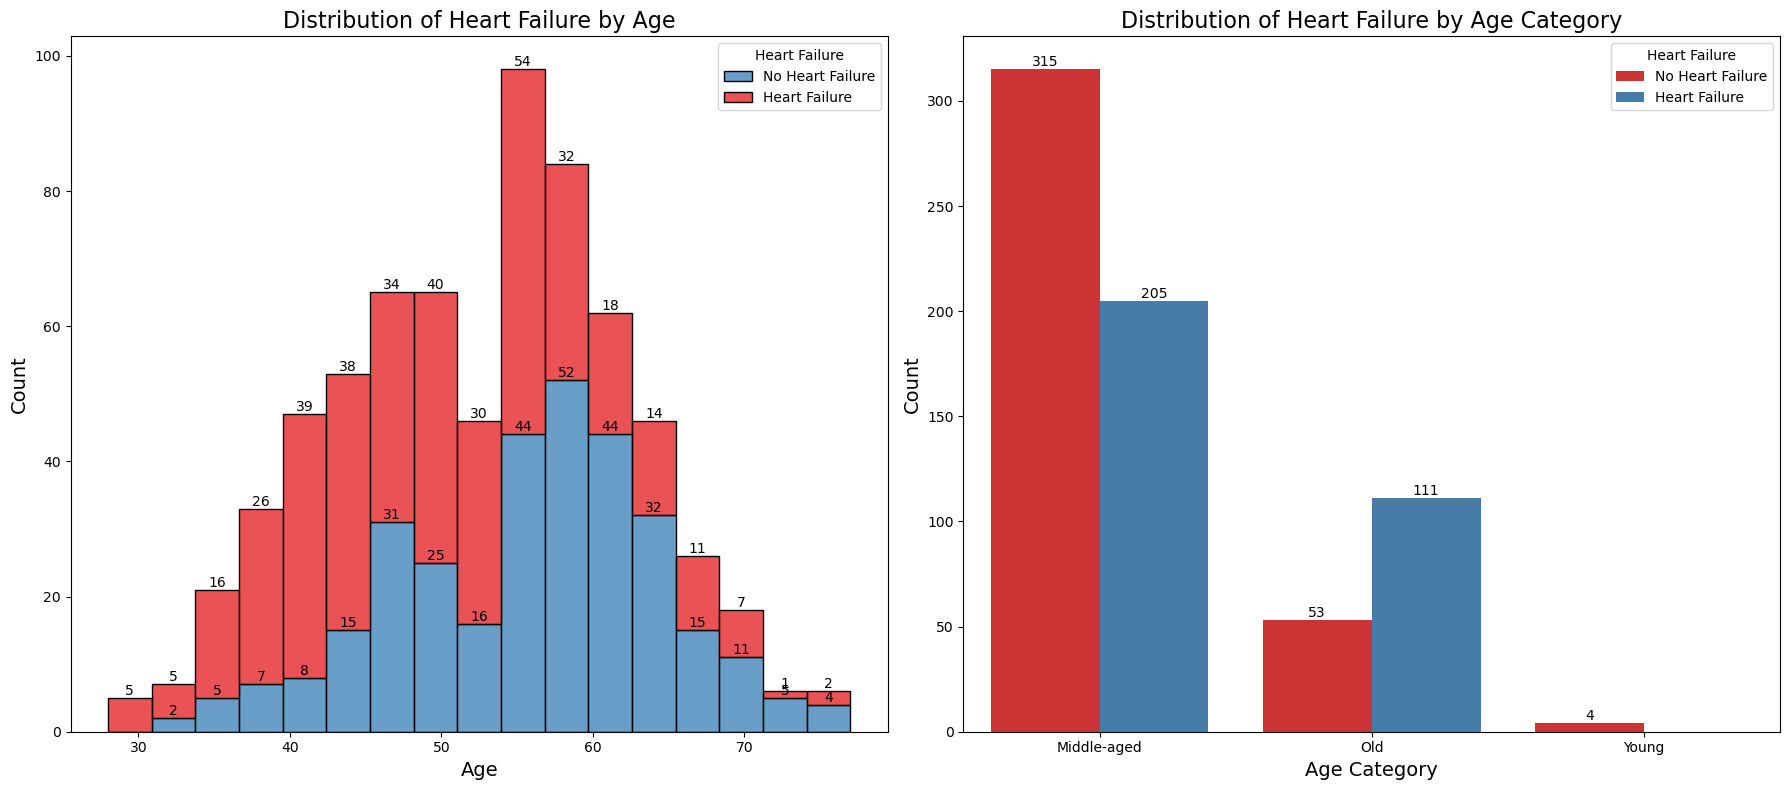

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot 1: Distribution of Heart Failure by Age
sns.histplot(data=heart, x='Age', hue='HeartFailure', multiple='stack', palette='Set1', ax=axes[0])
axes[0].set_title('Distribution of Heart Failure by Age', fontsize=16)
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Heart Failure', labels=['No Heart Failure', 'Heart Failure'], loc='upper right')

# Plot 2: Distribution of Heart Failure by Age Category
sns.countplot(x=heart['Age'].apply(categorize_age), hue='HeartFailure', data=heart, palette='Set1', ax=axes[1])
axes[1].set_title('Distribution of Heart Failure by Age Category', fontsize=16)
axes[1].set_xlabel('Age Category', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Heart Failure', labels=['No Heart Failure', 'Heart Failure'], loc='upper right')

bar_heights(axes[0])
bar_heights(axes[1])

plt.tight_layout()
plt.show()

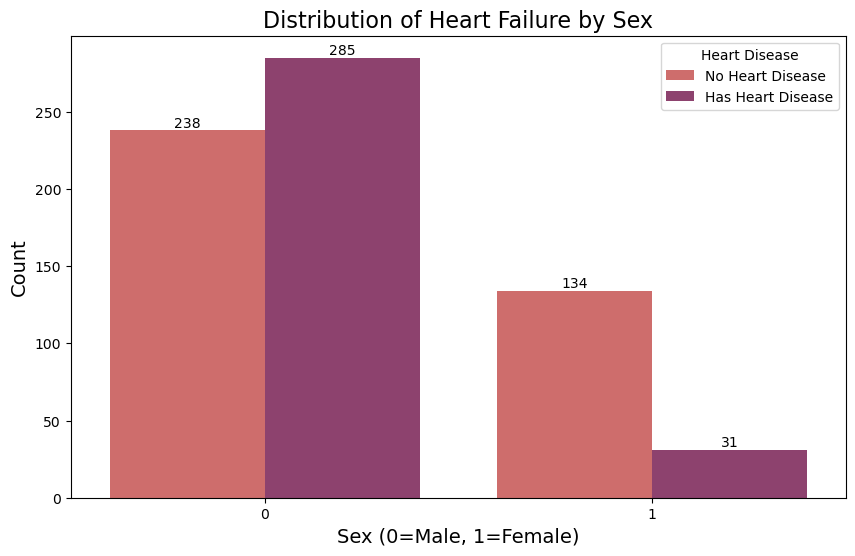

In [27]:
plt.figure(figsize=(10, 6))


# Create a countplot to visualize heart disease by sex
sexheart=sns.countplot(x='Sex', hue='HeartFailure', data=heart, palette='flare')

# Set plot title and labels
plt.title('Distribution of Heart Failure by Sex', fontsize=16)
plt.xlabel('Sex (0=Male, 1=Female)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set legend labels
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

bar_heights(sexheart)

# Show the plot
plt.show()

In [28]:
def categorize_RestingBP(RestingBP):
    if RestingBP < 120:
        return 'Normal'
    elif RestingBP >= 120 and RestingBP < 129:
        return 'Elevated'
    else:
        return 'Hypertension'

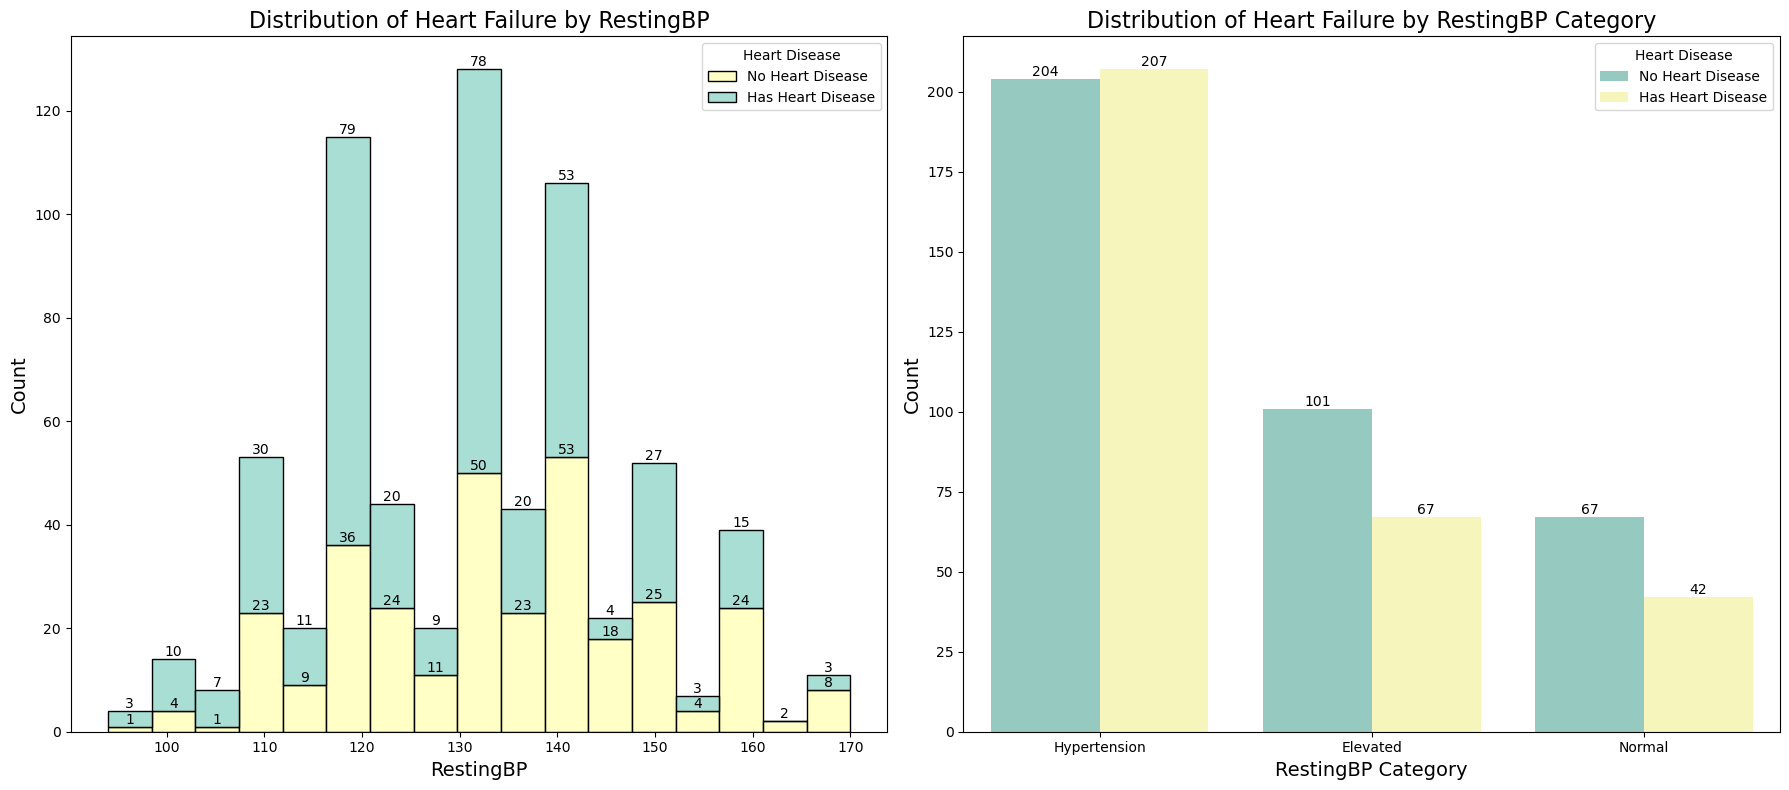

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot 1: Distribution of Heart Failure by RestingBP Category
sns.histplot(data=heart, x='RestingBP', hue='HeartFailure', multiple='stack', palette='Set3', ax=axes[0])

# Set plot title and labels for Plot 1
axes[0].set_title('Distribution of Heart Failure by RestingBP', fontsize=16)
axes[0].set_xlabel('RestingBP', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

# Plot 2: Distribution of Heart Failure by RestingBP Category
sns.countplot(x=heart['RestingBP'].apply(categorize_RestingBP), hue='HeartFailure', data=heart, palette='Set3', ax=axes[1])

# Set plot title and labels for Plot 2
axes[1].set_title('Distribution of Heart Failure by RestingBP Category', fontsize=16)
axes[1].set_xlabel('RestingBP Category', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

bar_heights(axes[0])
bar_heights(axes[1])

plt.tight_layout()
plt.show()


In [30]:
def categorize_Cholesterol(Cholesterol):
    if Cholesterol < 200:
        return 'Good'
    elif Cholesterol >= 200 and Cholesterol < 239:
        return 'Elevated'
    else:
        return 'High'

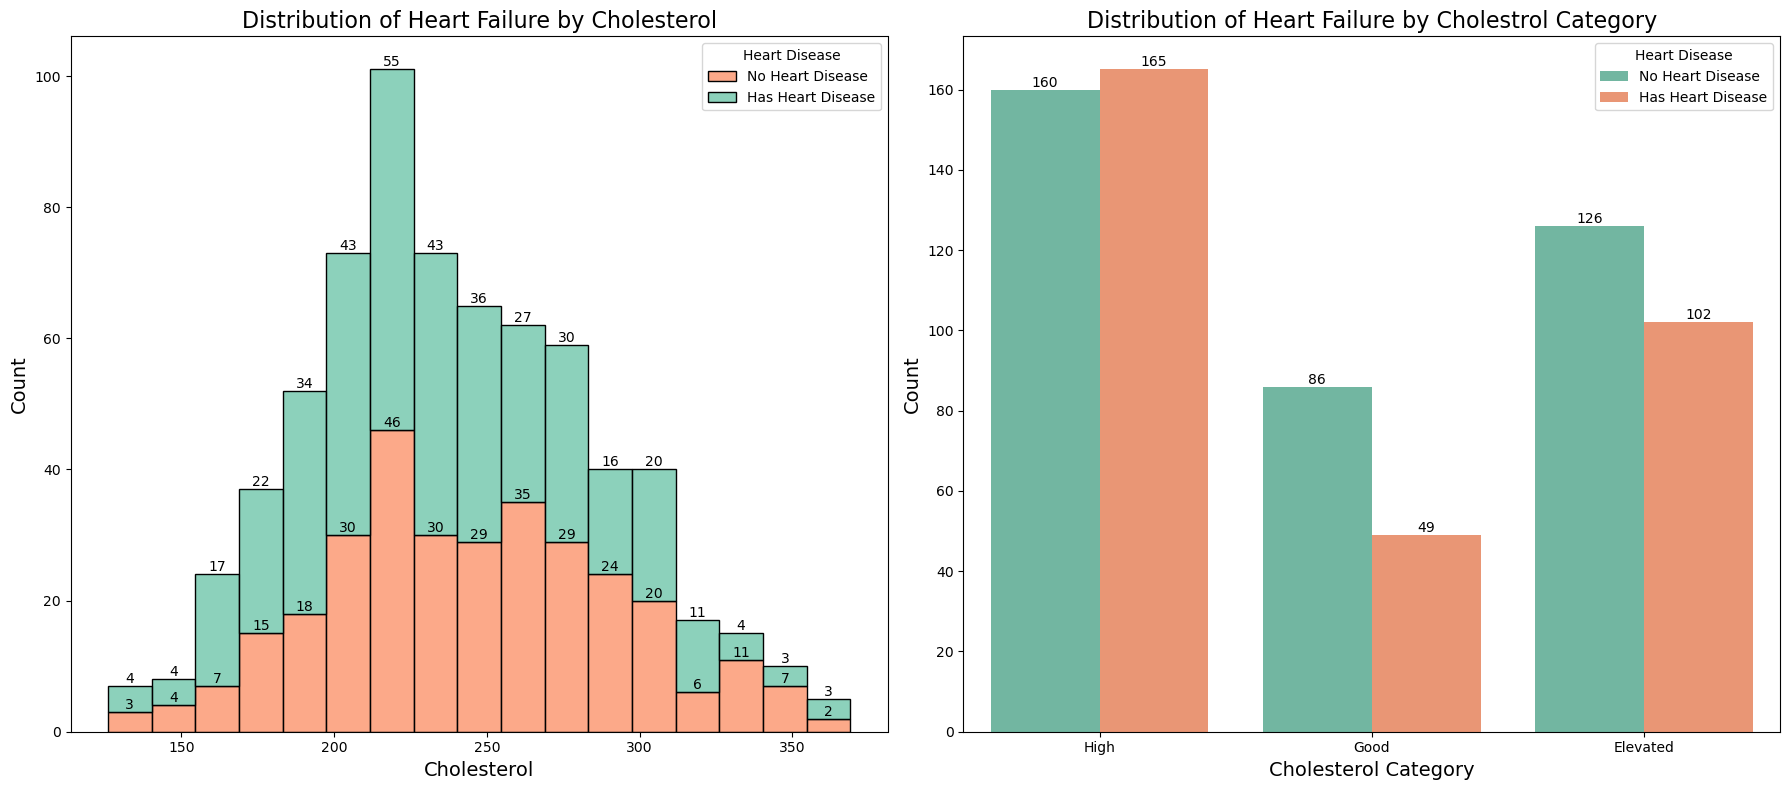

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot 1: Distribution of Heart Failure by Cholestrol Category
sns.histplot(data=heart, x='Cholesterol', hue='HeartFailure', multiple='stack', palette='Set2', ax=axes[0])

# Set plot title and labels for Plot 1
axes[0].set_title('Distribution of Heart Failure by Cholesterol', fontsize=16)
axes[0].set_xlabel('Cholesterol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

# Plot 2: Distribution of Heart Failure by Set2' Category
sns.countplot(x=heart['Cholesterol'].apply(categorize_Cholesterol), hue='HeartFailure', data=heart, palette='Set2', ax=axes[1])

# Set plot title and labels for Plot 2
axes[1].set_title('Distribution of Heart Failure by Cholestrol Category', fontsize=16)
axes[1].set_xlabel('Cholesterol Category', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')

bar_heights(axes[0])
bar_heights(axes[1])

plt.tight_layout()
plt.show()

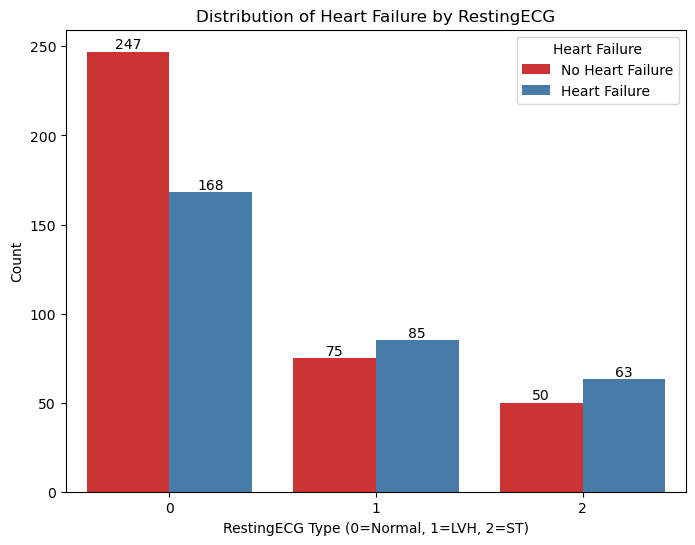

In [32]:
# Create a countplot to visualize ChestPainType vs. HeartFailure
plt.figure(figsize=(8, 6))
ecgheart=sns.countplot(x='RestingECG', hue='HeartFailure', data=heart, palette='Set1')
plt.title('Distribution of Heart Failure by RestingECG')
plt.xlabel('RestingECG Type (0=Normal, 1=LVH, 2=ST)')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
bar_heights(ecgheart)
plt.show()

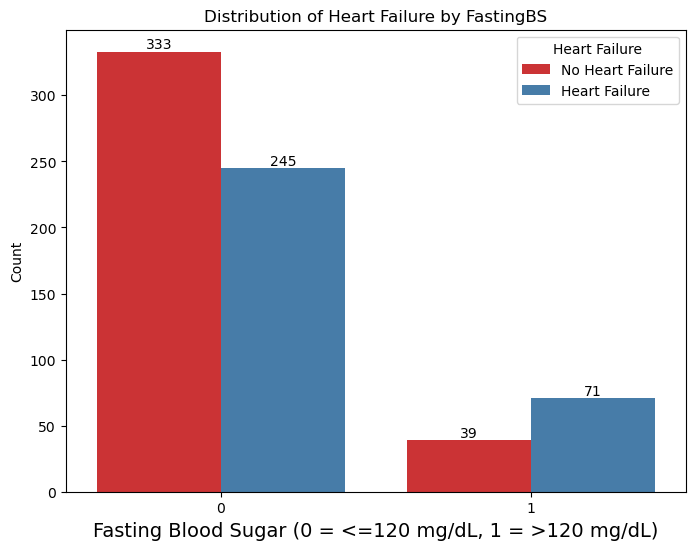

In [33]:
# Create a countplot to visualize ChestPainType vs. HeartFailure
plt.figure(figsize=(8, 6))
bsheart=sns.countplot(x='FastingBS', hue='HeartFailure', data=heart, palette='Set1')
plt.title('Distribution of Heart Failure by FastingBS')
plt.xlabel('Fasting Blood Sugar (0 = <=120 mg/dL, 1 = >120 mg/dL)', fontsize=14)
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
bar_heights(bsheart)
plt.show()

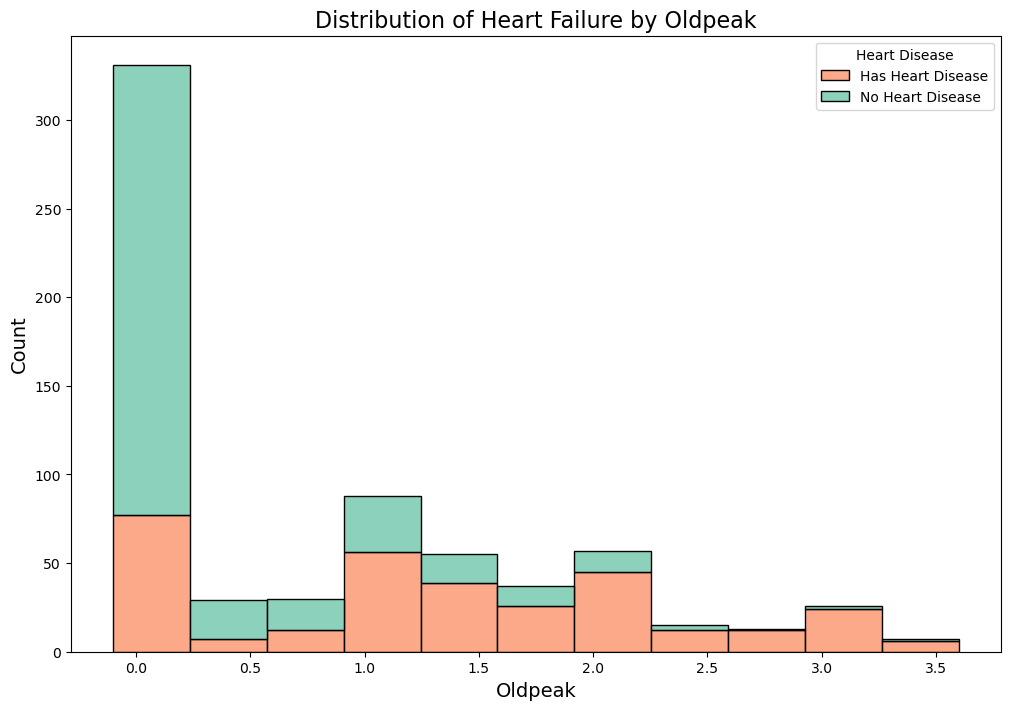

In [34]:
plt.figure(figsize=(12, 8))

Oldpeakheart=sns.histplot(data=heart, x='Oldpeak', hue='HeartFailure', multiple='stack', palette='Set2')

plt.title('Distribution of Heart Failure by Oldpeak', fontsize=16)
plt.xlabel('Oldpeak', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.legend(title='Heart Disease', labels=['Has Heart Disease', 'No Heart Disease'], loc='upper right')
plt.show()

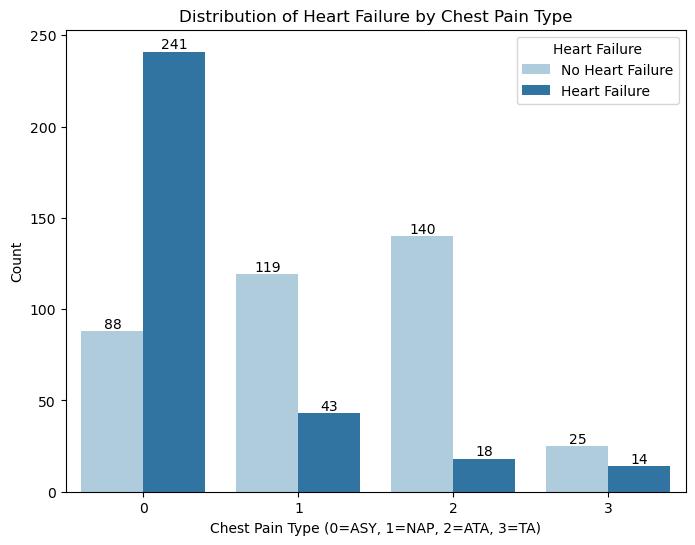

In [35]:
plt.figure(figsize=(8, 6))
cptheart=sns.countplot(x='ChestPainType', hue='HeartFailure', data=heart, palette="Paired")
plt.title('Distribution of Heart Failure by Chest Pain Type')
plt.xlabel('Chest Pain Type (0=ASY, 1=NAP, 2=ATA, 3=TA)')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
bar_heights(cptheart)
plt.show()

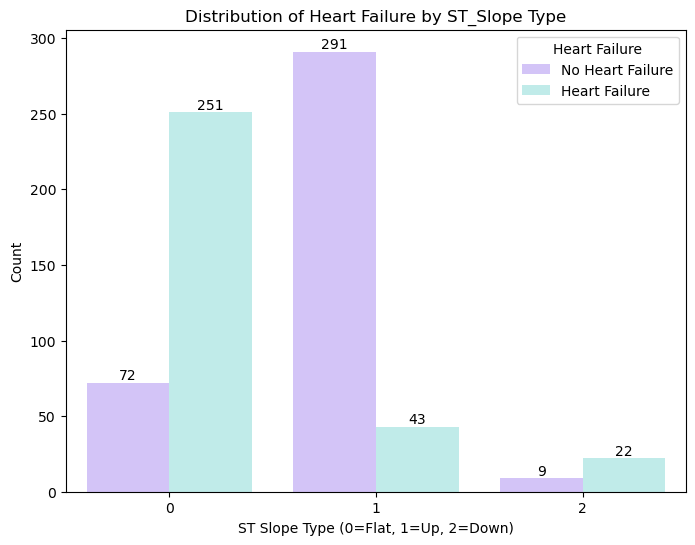

In [36]:
plt.figure(figsize=(8, 6))
stheart=sns.countplot(x='ST_Slope', hue='HeartFailure', data=heart, palette='blend:#d0bbff,#b9f2f0')
plt.title('Distribution of Heart Failure by ST_Slope Type')
plt.xlabel('ST Slope Type (0=Flat, 1=Up, 2=Down)')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
bar_heights(stheart)
plt.show()

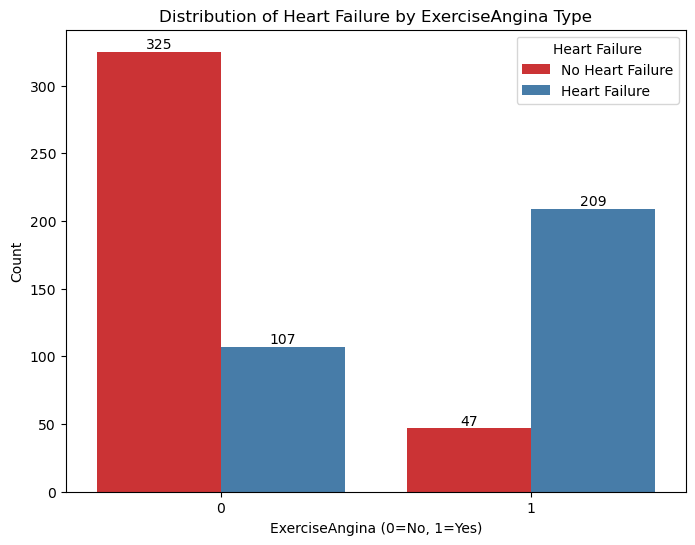

In [37]:
plt.figure(figsize=(8, 6))
eaheart=sns.countplot(x='ExerciseAngina', hue='HeartFailure', data=heart, palette='Set1')
plt.title('Distribution of Heart Failure by ExerciseAngina Type')
plt.xlabel('ExerciseAngina (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Failure', loc='upper right')
bar_heights(eaheart)
plt.show()

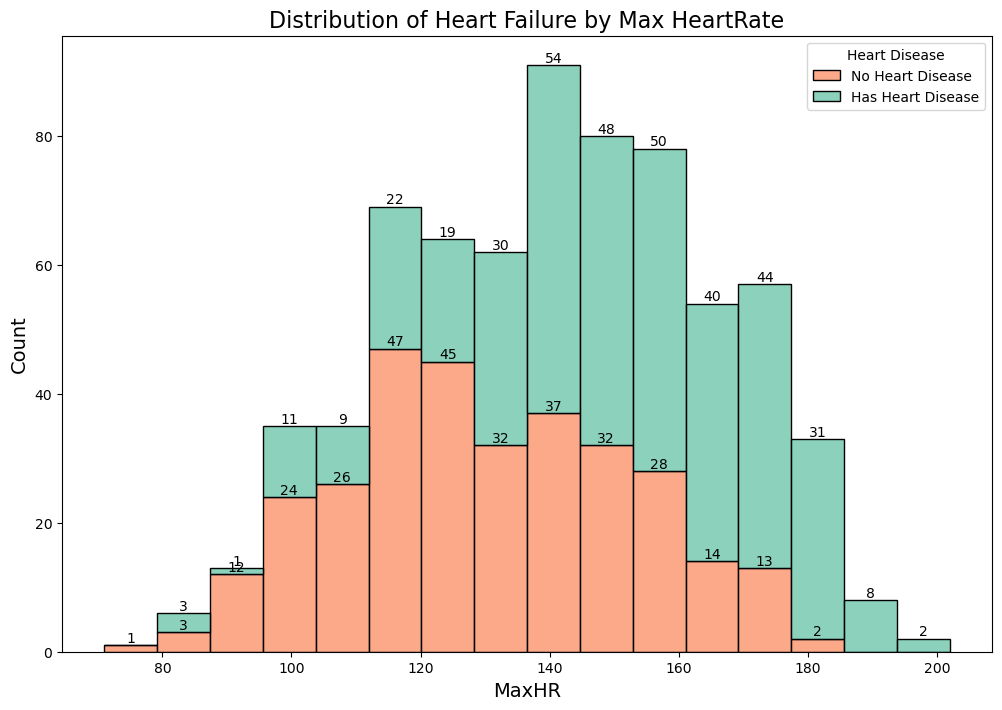

In [38]:
plt.figure(figsize=(12, 8))
MaxHRheart=sns.histplot(data=heart, x='MaxHR', hue='HeartFailure', multiple='stack', palette='Set2')
plt.title('Distribution of Heart Failure by Max HeartRate', fontsize=16)
plt.xlabel('MaxHR', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Has Heart Disease'], loc='upper right')
bar_heights(MaxHRheart)
plt.show()

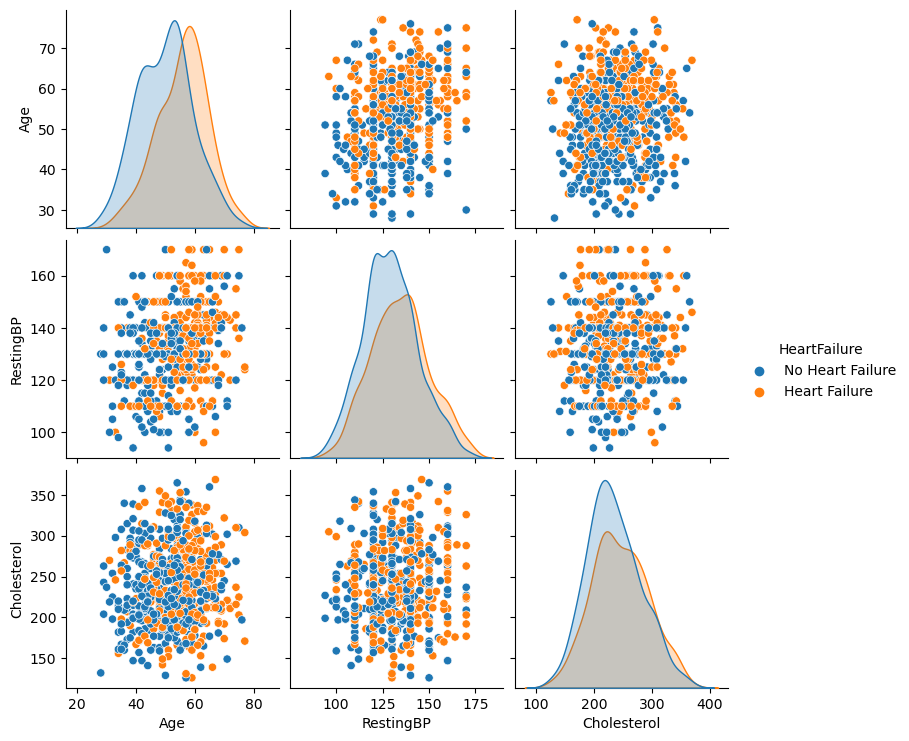

In [39]:
mostIMP = ['Age', 'RestingBP', 'Cholesterol', 'HeartFailure']
sns.pairplot(heart[mostIMP],hue='HeartFailure')

In [40]:
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,52.619186,0.239826,0.864826,131.463663,239.515988,0.159884,0.561047,140.736919,0.372093,0.821657,0.575581
std,9.485776,0.427288,0.957943,15.275114,46.952449,0.366765,0.758682,24.511453,0.483715,0.955401,0.578697
min,28.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,207.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,235.000000,0.000000,0.000000,141.000000,0.000000,0.400000,1.000000
75%,59.000000,0.000000,2.000000,140.000000,271.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.000000,1.000000,2.000000,202.000000,1.000000,3.600000,2.000000


In [41]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Select only numeric columns for scaling
numeric_cols = heart.select_dtypes(include=[np.number]).columns

# Normalize the data
scaler = MinMaxScaler()#scale the numeric data between 0 and 1
normalized_data = scaler.fit_transform(heart[numeric_cols])#selected numeric columns are normalized using fit_transform
nor_heart = pd.DataFrame(normalized_data, columns=numeric_cols)#normalized data is stored in the nor_heart DataFrame.

# Convert the normalized data to an array
normalized_data = np.array(nor_heart)

# Select specific columns for clustering
selected_columns = ['Age', 'RestingBP', 'Cholesterol']
data = np.array(nor_heart[selected_columns])

# Choose the number of clusters (k)
k = 2 # You can adjust this based on your problem and evaluation metrics

# Initialize KMedoids clustering algorithm with the normalized data
kmedoids = KMedoids(n_clusters=k).fit(data)

# Get cluster centers and labels
clusters = kmedoids.cluster_centers_
labels = kmedoids.labels_

print("Labels:", labels, "\n")
print("Cluster:", clusters, "\n")

# Print the points for each center
for j in range(k):
    for i in range(len(data)):
        if kmedoids.labels_[i] == j:
            x = data[i]
            print("Cluster", j, ":", x)

Labels: [1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1
 0 1 0 1 1 0 0 1 

## Accuarcy test

The silhouette score ranges from -1 to 1, where a higher value indicates that the samples are closer to their own clusters

In [44]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.24671061230936336


ratio of between-cluster distribution. Higher values of this index indicate better-defined clusters.

In [45]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)




Calinski-Harabasz Index: 254.53507211130366


measures the average "similarity" between each cluster and its most similar cluster, where similarity is defined as the ratio of within-cluster distances to between-cluster distances. Lower values of this index indicate better clustering.

In [46]:
# Compute Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, labels)
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 1.497822508144048


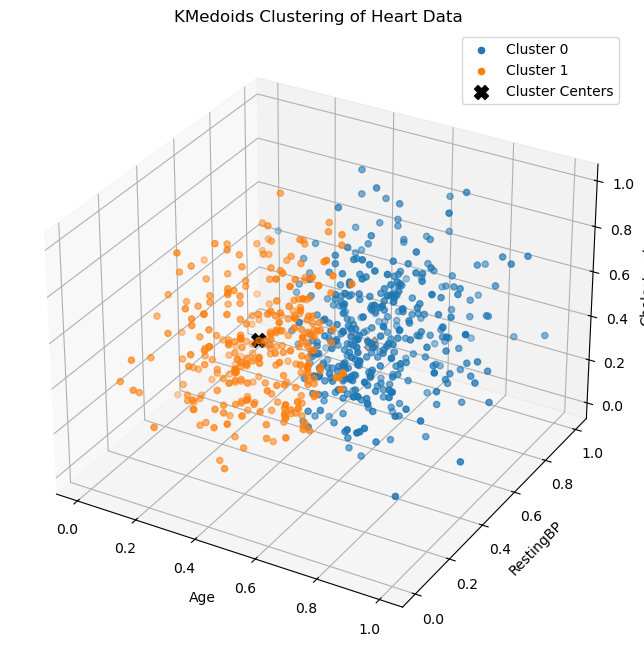

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each cluster
for j in range(k):
    cluster_points = data[labels == j]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {j}')

# Plot cluster centers
ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c='black', marker='X', s=100, label='Cluster Centers')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('RestingBP')
ax.set_zlabel('Cholesterol')
ax.set_title('KMedoids Clustering of Heart Data')

# Add legend
ax.legend()

# Show plot
plt.show()


In [48]:
sns.set_style("darkgrid")

In [49]:
# Select only numeric columns for scaling
datan=heart.select_dtypes(include='number')
datan

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140,289,0,0,172,0,0.0,1
1,49,1,1,160,180,0,0,156,0,1.0,0
2,37,0,2,130,283,0,2,98,0,0.0,1
3,48,1,0,138,214,0,0,108,1,1.5,0
4,54,0,1,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0
914,68,0,0,144,193,1,0,141,0,3.4,0
915,57,0,0,130,131,0,0,115,1,1.2,0
916,57,1,2,130,236,0,1,174,0,0.0,0


In [50]:
# Hierarical Clustering by using scipy

#import required functions to draw the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#the linkage function for calculating the distance between clusters
x1 = linkage(datan, method='single', metric='euclidean')
x2 = linkage(datan, method='complete', metric='euclidean')
x3 = linkage(datan, method='average', metric='euclidean')
x4 = linkage(datan, method='ward', metric='euclidean')

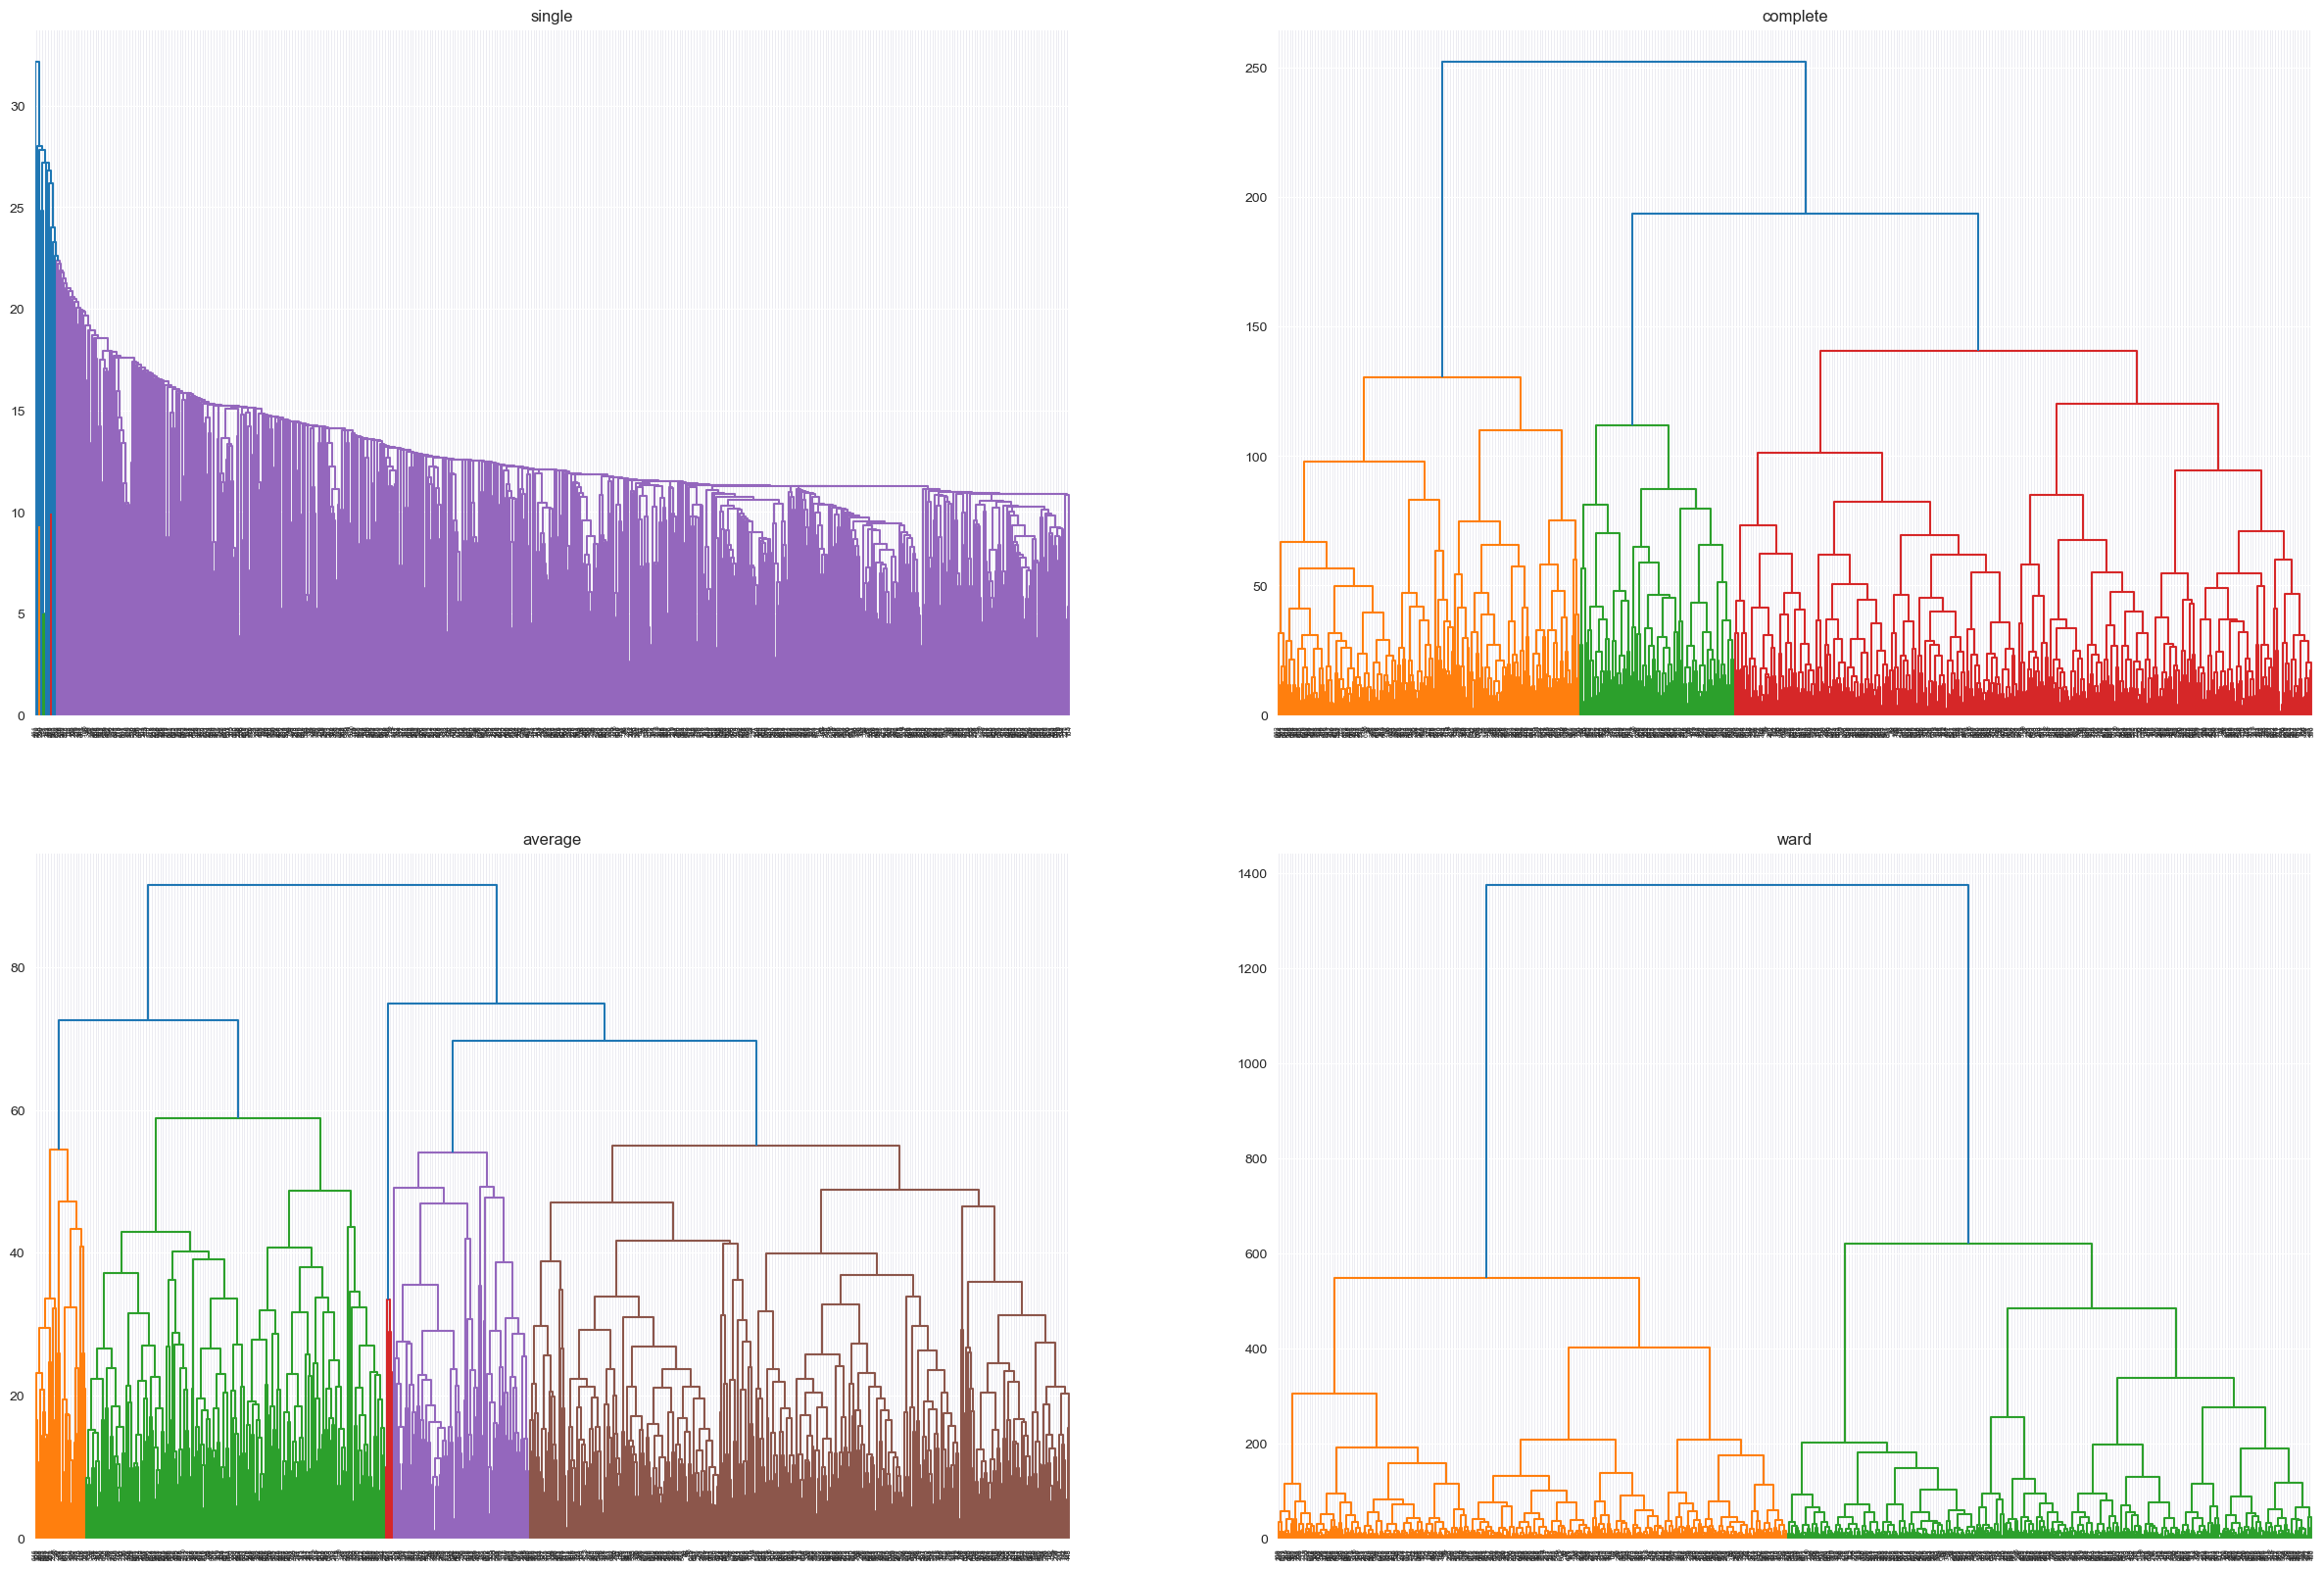

In [51]:
#view a plot of thes linkage
plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1), dendrogram(x1), plt.title('single')
plt.subplot(2, 2, 2), dendrogram(x2), plt.title('complete')
plt.subplot(2, 2, 3), dendrogram(x3), plt.title('average')
plt.subplot(2, 2, 4), dendrogram(x4), plt.title('ward')
plt.show()

In [52]:
# Lastly, assign the cluster labels using the fcluster function
heart['Clusters'] = fcluster(x1, 12)
heart


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure,Clusters
0,40,0,2,140,289,0,0,172,0,0.0,1,No Heart Failure,1
1,49,1,1,160,180,0,0,156,0,1.0,0,Heart Failure,1
2,37,0,2,130,283,0,2,98,0,0.0,1,No Heart Failure,1
3,48,1,0,138,214,0,0,108,1,1.5,0,Heart Failure,1
4,54,0,1,150,195,0,0,122,0,0.0,1,No Heart Failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0,Heart Failure,1
914,68,0,0,144,193,1,0,141,0,3.4,0,Heart Failure,1
915,57,0,0,130,131,0,0,115,1,1.2,0,Heart Failure,1
916,57,1,2,130,236,0,1,174,0,0.0,0,Heart Failure,1


In [53]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [54]:
# Calculate silhouette coefficients
silhouette_score_single = silhouette_score(datan, fcluster(x1, 2, criterion='maxclust'))
silhouette_score_complete = silhouette_score(datan, fcluster(x2, 2, criterion='maxclust'))
silhouette_score_average = silhouette_score(datan, fcluster(x3, 2, criterion='maxclust'))
silhouette_score_ward = silhouette_score(datan, fcluster(x4, 2, criterion='maxclust'))

# Print silhouette coefficients
print("Silhouette Coefficient (Single Linkage):", silhouette_score_single)
print("Silhouette Coefficient (Complete Linkage):", silhouette_score_complete)
print("Silhouette Coefficient (Average Linkage):", silhouette_score_average)
print("Silhouette Coefficient (Ward Linkage):", silhouette_score_ward)

Silhouette Coefficient (Single Linkage): 0.37224023352997493
Silhouette Coefficient (Complete Linkage): 0.23966680789793704
Silhouette Coefficient (Average Linkage): 0.3707471337627466
Silhouette Coefficient (Ward Linkage): 0.3476626389176558


In [55]:
# Calculate Calinski-Harabasz index
calinski_harabasz_score_single = calinski_harabasz_score(datan, fcluster(x1, 2, criterion='maxclust'))
calinski_harabasz_score_complete = calinski_harabasz_score(datan, fcluster(x2, 2, criterion='maxclust'))
calinski_harabasz_score_average = calinski_harabasz_score(datan, fcluster(x3, 2, criterion='maxclust'))
calinski_harabasz_score_ward = calinski_harabasz_score(datan, fcluster(x4, 2, criterion='maxclust'))

# Print Calinski-Harabasz index
print("Calinski-Harabasz Index (Single Linkage):", calinski_harabasz_score_single)
print("Calinski-Harabasz Index (Complete Linkage):", calinski_harabasz_score_complete)
print("Calinski-Harabasz Index (Average Linkage):", calinski_harabasz_score_average)
print("Calinski-Harabasz Index (Ward Linkage):", calinski_harabasz_score_ward)

Calinski-Harabasz Index (Single Linkage): 4.593645105022048
Calinski-Harabasz Index (Complete Linkage): 303.13446319406347
Calinski-Harabasz Index (Average Linkage): 540.857966202244
Calinski-Harabasz Index (Ward Linkage): 537.8832004527137


In [56]:
dataa = np.array(datan)
dataa

array([[40. ,  0. ,  2. , ...,  0. ,  0. ,  1. ],
       [49. ,  1. ,  1. , ...,  0. ,  1. ,  0. ],
       [37. ,  0. ,  2. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  0. ,  0. , ...,  1. ,  1.2,  0. ],
       [57. ,  1. ,  2. , ...,  0. ,  0. ,  0. ],
       [38. ,  0. ,  1. , ...,  0. ,  0. ,  1. ]])

In [57]:
# Hierarical Clustering by using scikit_Learn
#!pip install scikit-Learn
from sklearn.cluster import AgglomerativeClustering
z1= AgglomerativeClustering(n_clusters= 2, linkage='single')
labels_z1=z1.fit_predict(dataa)
print(z1.labels_)

z2= AgglomerativeClustering(n_clusters= 2, linkage='complete')
labels_z2=z2.fit_predict(dataa)
print(z2.labels_)

z3= AgglomerativeClustering(n_clusters= 2, linkage='average')
labels_z3=z3.fit_predict(dataa)
print(z3.labels_)

z4= AgglomerativeClustering(n_clusters= 2, linkage='ward')
labels_z4=z4.fit_predict(dataa)
print(z4.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

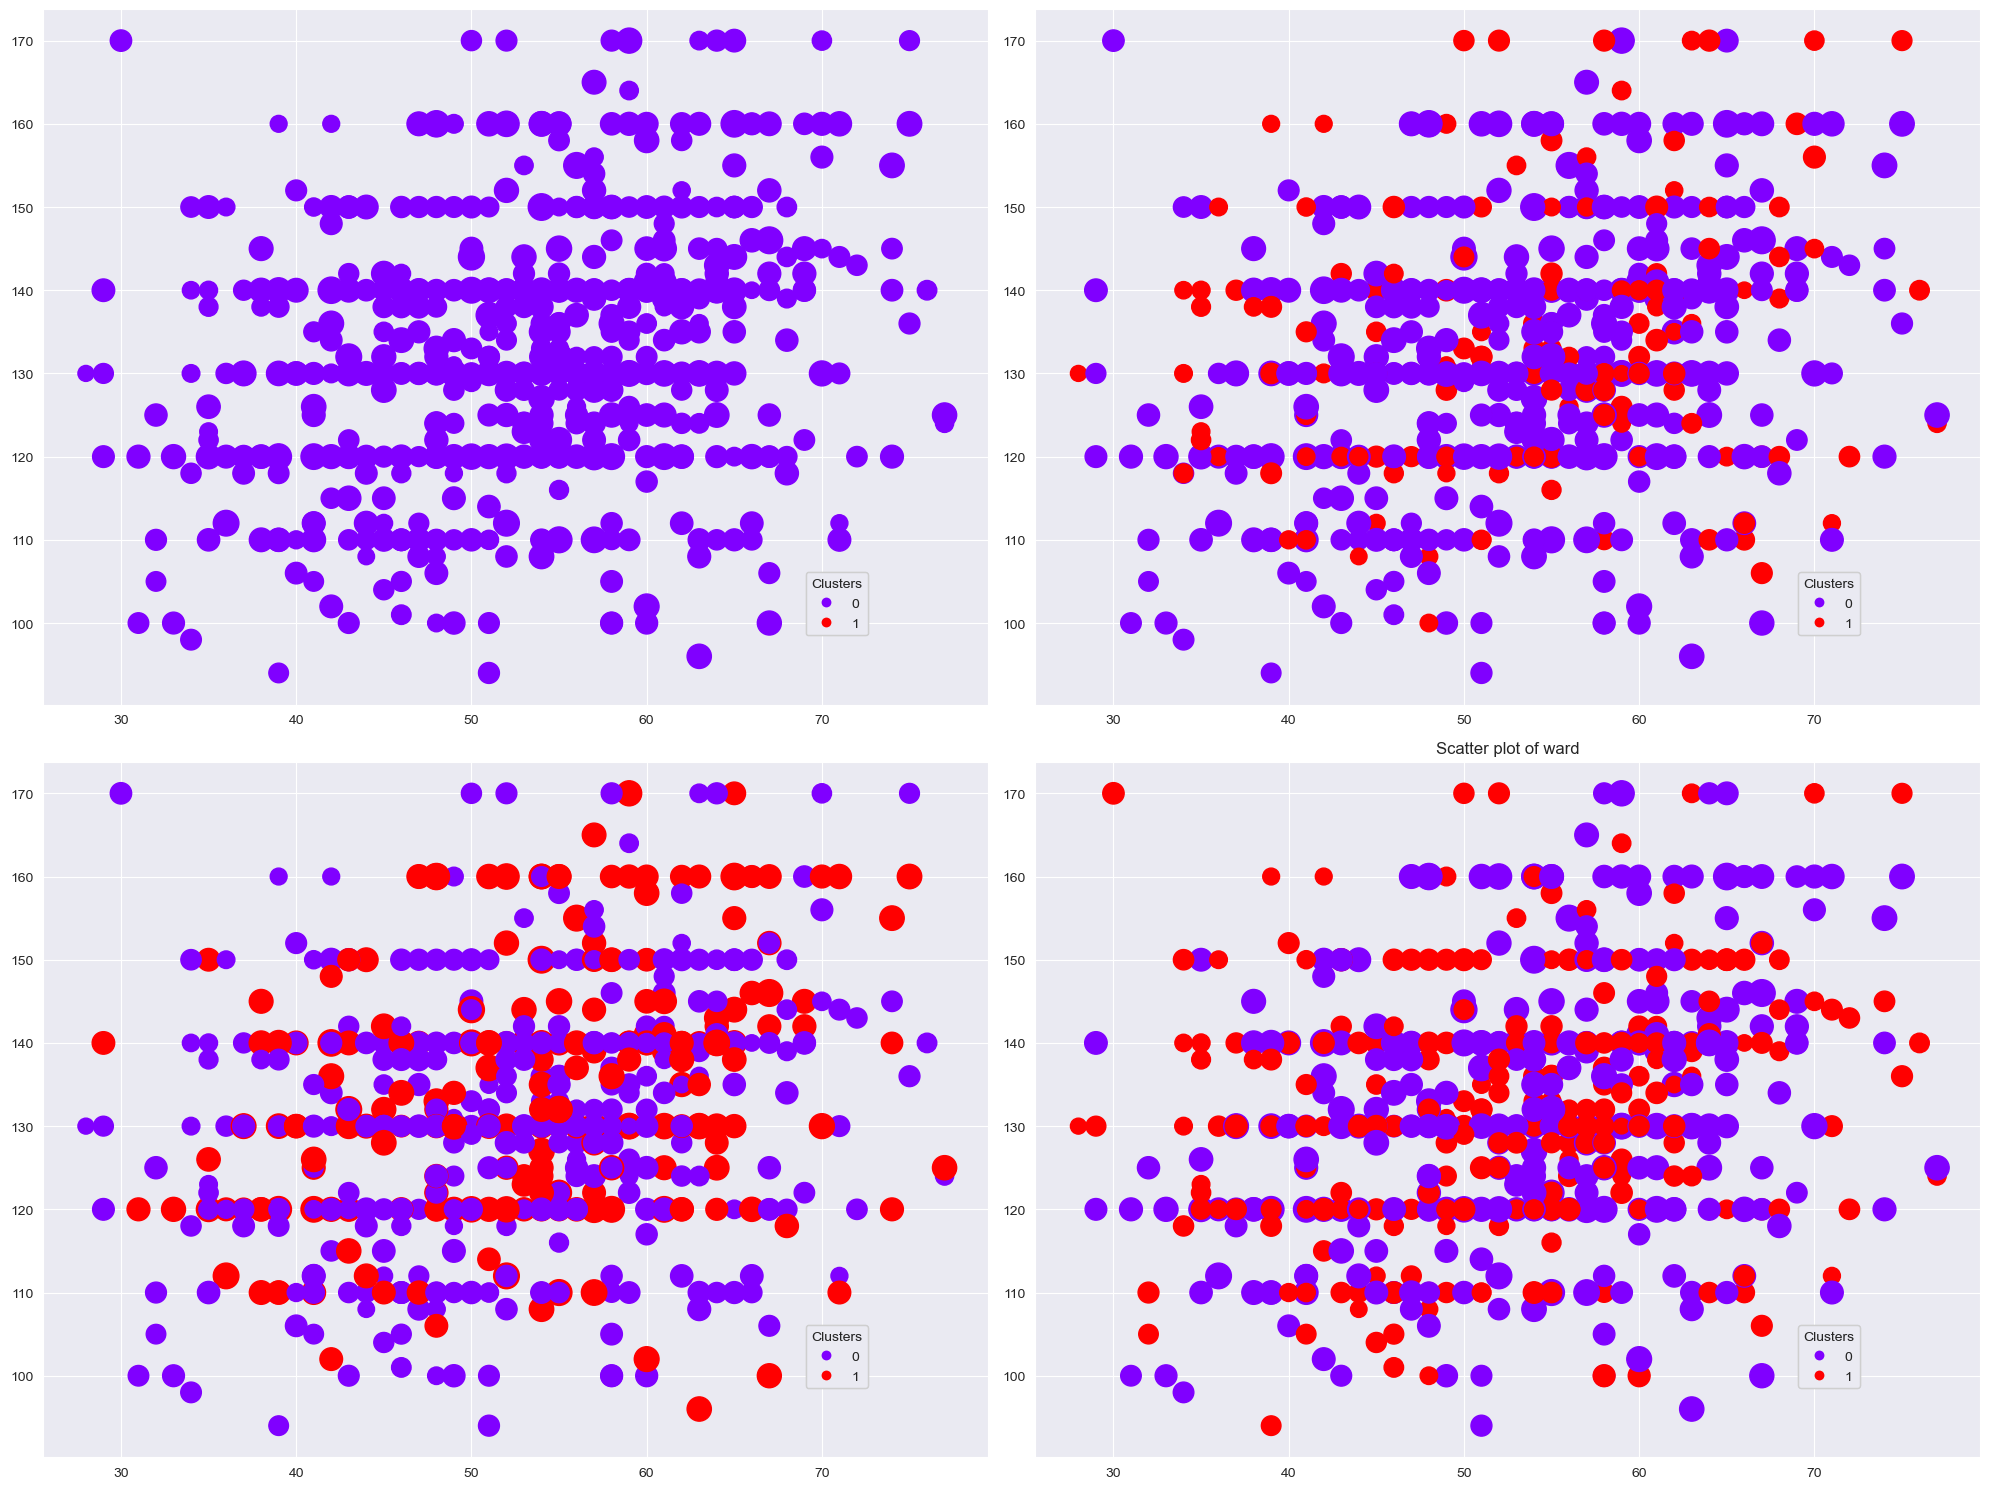

In [58]:
fig, ax = plt.subplots(2 ,2, figsize=(20, 15))

scatter= ax[0, 0].scatter(dataa[:,0], dataa[:,3], dataa[:,4], c=z1.labels_, cmap='rainbow')
legend= ax[0, 0].legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(0.8, 0.2))
ax[0, 0].add_artist(legend)
plt.title('Scatter plot of single')

scatter= ax[0, 1].scatter(dataa[:,0], dataa[:,3], dataa[:,4], c=z2.labels_, cmap='rainbow')
legend= ax[0, 1].legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(0.8, 0.2))
ax[0, 1].add_artist(legend)
plt.title('Scatter plot of complete')

scatter= ax[1, 0].scatter(dataa[:,0], dataa[:,3], dataa[:,4], c=z3.labels_, cmap='rainbow')
legend= ax[1, 0].legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(0.8, 0.2))
ax[1, 0].add_artist(legend)
plt.title('Scatter plot of average')

scatter= ax[1, 1].scatter(dataa[:,0], dataa[:,3], dataa[:,4], c=z4.labels_, cmap='rainbow')
legend= ax[1, 1].legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(0.8, 0.2))
ax[1, 1].add_artist(legend)
plt.title('Scatter plot of ward')

# Display the plot
plt.tight_layout()
plt.show()

In [59]:
# Calculate the silhouette coefficient for each clustering result
silhouette_score_single = silhouette_score(dataa, z1.labels_)
silhouette_score_complete = silhouette_score(dataa, z2.labels_)
silhouette_score_average = silhouette_score(dataa, z3.labels_)
silhouette_score_ward = silhouette_score(dataa, z4.labels_)

print("Silhouette Coefficient (Single Linkage):", silhouette_score_single)
print("Silhouette Coefficient (Complete Linkage):", silhouette_score_complete)
print("Silhouette Coefficient (Average Linkage):", silhouette_score_average)
print("Silhouette Coefficient (Ward Linkage):", silhouette_score_ward)

Silhouette Coefficient (Single Linkage): 0.37224023352997493
Silhouette Coefficient (Complete Linkage): 0.23966680789793704
Silhouette Coefficient (Average Linkage): 0.3707471337627466
Silhouette Coefficient (Ward Linkage): 0.3476626389176558


In [60]:
# Evaluate with Calinski-Harabasz index
score_z1 = calinski_harabasz_score(dataa, labels_z1)
score_z2 = calinski_harabasz_score(dataa, labels_z2)
score_z3 = calinski_harabasz_score(dataa, labels_z3)
score_z4 = calinski_harabasz_score(dataa, labels_z4)

# Print the Calinski-Harabasz index scores
print("Calinski-Harabasz Index (Single Linkage):", score_z1)
print("Calinski-Harabasz Index (Complete Linkage):", score_z2)
print("Calinski-Harabasz Index (Average Linkage):", score_z3)
print("Calinski-Harabasz Index (Ward Linkage):", score_z4)

Calinski-Harabasz Index (Single Linkage): 4.593645105022048
Calinski-Harabasz Index (Complete Linkage): 303.13446319406347
Calinski-Harabasz Index (Average Linkage): 540.857966202244
Calinski-Harabasz Index (Ward Linkage): 537.8832004527137


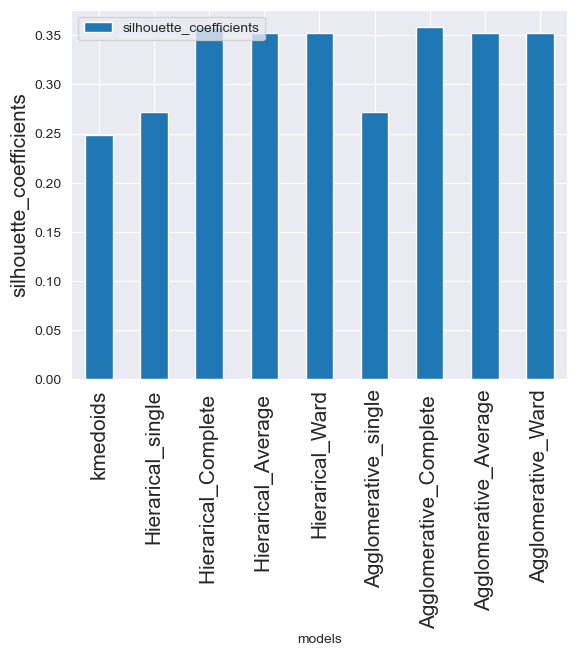

In [61]:
df1 = pd.DataFrame({'models':['kmedoids', 'Hierarical_single', 'Hierarical_Complete ', 'Hierarical_Average ', 'Hierarical_Ward', 'Agglomerative_single', 'Agglomerative_Complete ', 'Agglomerative_Average', 'Agglomerative_Ward'], 'silhouette_coefficients':[0.24807220662377652 , 0.27180867363058886 , 0.35825013233171027 , 0.3526227845808432 , 0.3522896050459138 , 0.27180867363058886 , 0.35825013233171027 , 0.3526227845808432 , 0.3522896050459138]})
ax = df1.plot.bar(x='models', y='silhouette_coefficients', rot=90)
plt.xticks(fontsize=15)
plt.ylabel("silhouette_coefficients",fontsize=15)
plt.show()

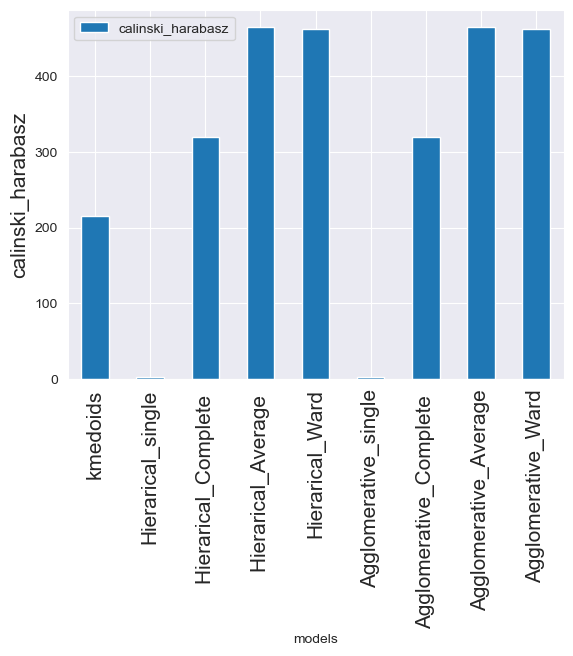

In [62]:
df2 = pd.DataFrame({'models':['kmedoids', 'Hierarical_single', 'Hierarical_Complete ', 'Hierarical_Average ', 'Hierarical_Ward', 'Agglomerative_single', 'Agglomerative_Complete ', 'Agglomerative_Average', 'Agglomerative_Ward'], 'calinski_harabasz':[214.89584330176973 , 2.8269466642248204 , 318.883799425244 , 464.02901683492115 , 462.3254509234773 , 2.8269466642248204 , 318.883799425244 , 464.02901683492115 , 462.3254509234773]})
ax = df2.plot.bar(x='models', y='calinski_harabasz', rot=90)
plt.xticks(fontsize=15)
plt.ylabel("calinski_harabasz",fontsize=15)
plt.show()